### Import Libraries and Test Images

In [15]:
# standard imports
from typing import Dict, List
import numpy as np
import xarray as xr
import pandas as pd
import rioxarray
import matplotlib.pyplot as plt

# load up the saved dataset
import pickle
with open('/Users/Adrian/Documents/VS CODE/spicy-snow/tests/test_data/2_img_ds', 'rb') as f:
    ds = pickle.load(f)

# add module to path so python can import it. This is the directory with 
# the __init__.py file in it to let python know this is a module.
import sys
sys.path.append('/Users/Adrian/Documents/VS CODE/spicy-snow/spicy_snow')

# import the function to test
from processing.s1_preprocessing import s1_amp_to_dB, s1_dB_to_amp, merge_partial_s1_images

#dataset = ds.isel(time = slice(1, 3))
dataset = ds

In [ ]:
dataset

### Plot Incidence Angles Before Mask

(array([2.92000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.80000e+01,
        1.10900e+03, 5.92980e+04, 1.87979e+05, 6.90800e+03, 1.88000e+02]),
 array([ 0.        ,  4.85425186,  9.70850372, 14.56275558, 19.41700745,
        24.27125931, 29.12551117, 33.97976303, 38.83401489, 43.68826675,
        48.54251862]),
 <BarContainer object of 10 artists>)

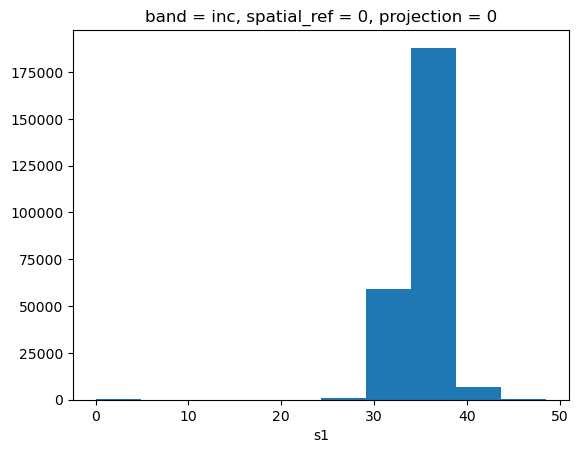

In [16]:
# BEFORE

#s1_inc = s1[0, 2]
#s1_inc >= 0.7
#s1[dict(time=0, band=2)]

s1 = dataset.s1
s1_inc = s1.drop_sel(band=['VV', 'VH'])
s1_inc_deg = np.rad2deg(s1_inc)
#s1_inc.isel(time=0).plot()
s1_inc_deg.plot()

### Test Masking Function

In [17]:
# Select incidence angle from s1 data array
for band in ['inc']:
    data = dataset['s1'].sel(band=band)

    # Mask pixels with incidence angle > 70 degrees ('inc' <= 0.7)
    # data_masked = data.where(data <= 1.22)
    dataset['s1'].loc[dict(band = band)] = data.where(data <= np.rad2deg(70))


### Plot Incidence Angles After Mask

(array([2.92000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.80000e+01,
        1.10900e+03, 5.92980e+04, 1.87979e+05, 6.90800e+03, 1.88000e+02]),
 array([ 0.        ,  4.85425186,  9.70850372, 14.56275558, 19.41700745,
        24.27125931, 29.12551117, 33.97976303, 38.83401489, 43.68826675,
        48.54251862]),
 <BarContainer object of 10 artists>)

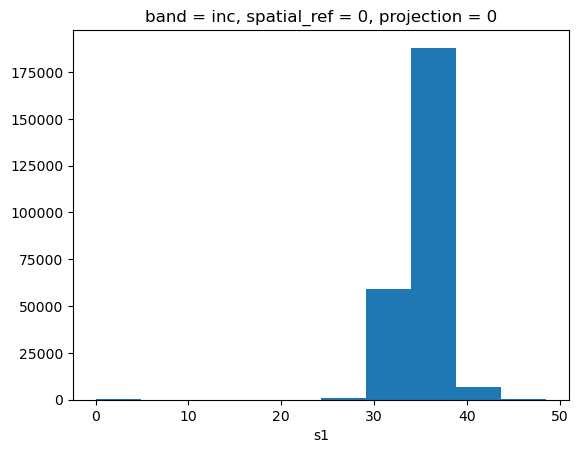

In [19]:
# AFTER
s1_afterinc = dataset.s1
s1_afterinc = s1.drop_sel(band=['VV', 'VH'])
s1_afterinc_deg = np.rad2deg(s1_afterinc)
#s1_afterinc.isel(time=0).plot()
s1_afterinc_deg.plot()

## FINAL FUNCTION

In [ ]:
def s1_incidence_angle_masking(dataset: xr.Dataset, inplace: bool = False) -> xr.Dataset:
"""
Remove s1 image outliers by masking pixels with incidence angles > 70 degrees

Args:
dataset: Xarray Dataset of sentinel images to mask incidence angle outliers

Returns:
dataset: Xarray Dataset of sentinel images with incidence angles > 70 degrees
masked
"""
 
# Check inplace flag
if not inplace:
        dataset = dataset.copy(deep=True)


# Mask pixels with incidence angle > 70 degrees
for band in ['inc']:
        data = dataset['s1'].sel(band=band)
        # Convert 'inc' from radians to degrees
        #data_deg = data * 180/(np.pi)

        # Convert 'inc' radians to degrees and mask array ('inc' <= 70 deg)
        dataset['s1'].loc[dict(band = band)] = data_deg.where(data_deg <= 0.7)

if not inplace:
        return dataset